### Import libraries

In [67]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

### Load dataset

In [68]:
df = pd.read_csv("../dataset/transformed_train.csv")

### Data convertion to implement the model

In [69]:
df.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Deck,Cabin_num,Side
0,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,False,B,0.0,P
1,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,True,F,0.0,S
2,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,A,0.0,S
3,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,A,0.0,S
4,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,True,F,1.0,S


In [70]:
df = pd.concat([df.drop("HomePlanet", axis = 1), pd.get_dummies(df["HomePlanet"])], axis = 1)
df = pd.concat([df.drop("Destination", axis = 1), pd.get_dummies(df["Destination"])], axis = 1)
df = pd.concat([df.drop("Deck", axis = 1), pd.get_dummies(df["Deck"])], axis = 1)
df = pd.concat([df.drop("Side", axis = 1), pd.get_dummies(df["Side"])], axis = 1)

df.head()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,Cabin_num,...,A,B,C,D,E,F,G,T,P,S
0,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,0.0,...,False,True,False,False,False,False,False,False,True,False
1,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,0.0,...,False,False,False,False,False,True,False,False,False,True
2,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,0.0,...,True,False,False,False,False,False,False,False,False,True
3,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,0.0,...,True,False,False,False,False,False,False,False,False,True
4,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,1.0,...,False,False,False,False,False,True,False,False,False,True


### Model: Decision Tree

In [71]:
x = df.drop("Transported",axis=1)
y = df["Transported"]

In [72]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=0)

In [73]:
from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(max_depth=10)
tree.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=10)

### Model evaluation

In [77]:
from sklearn.metrics import classification_report

#Predictions
y_train_pred = tree.predict(x_train)
y_test_pred = tree.predict(x_test)

#Report with train data
report_train = classification_report(y_train,y_train_pred)
print(f"Report with train data:\n{report_train}")

#Report with test data
report_test = classification_report(y_test,y_test_pred)
print(f"Report with test data:\n{report_test}")

Report with train data:
              precision    recall  f1-score   support

       False       0.80      0.90      0.85      3012
        True       0.89      0.78      0.83      3073

    accuracy                           0.84      6085
   macro avg       0.85      0.84      0.84      6085
weighted avg       0.85      0.84      0.84      6085

Report with test data:
              precision    recall  f1-score   support

       False       0.75      0.83      0.79      1303
        True       0.81      0.72      0.77      1305

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



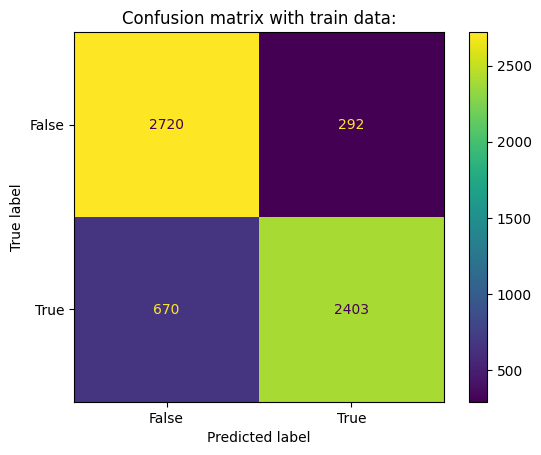

In [75]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

conf_matrix = confusion_matrix(y_train, y_train_pred)
display = ConfusionMatrixDisplay(conf_matrix, display_labels = tree.classes_)
display.plot()
plt.title("Confusion matrix with train data:")
plt.show()

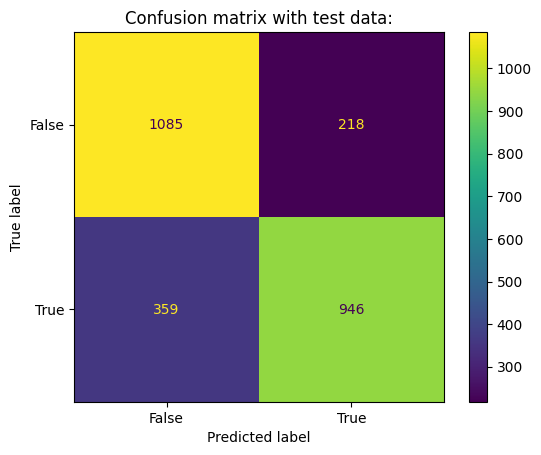

In [76]:
conf_matrix = confusion_matrix(y_test, y_test_pred)
display = ConfusionMatrixDisplay(conf_matrix, display_labels = tree.classes_)
display.plot()
plt.title("Confusion matrix with test data:")
plt.show()

The accuracy obtained with the different data are:
- Train data: __0.84__
- Test data: __0.78__

This values can be improve with a process of tuning or implemented a different machine learning model.